In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def rmse(y1, y2):
    return np.sum((y2-y1)**2)
    
def get_cuts(data, i):
    x = np.arange(0,2000.0, 0.1)
    ind = np.arange(1, 20000, 20)
    y = data[i,:]
    cut = np.arange(1,101) *  np.arange(1,101) / 5000
    ind_lim = y[ind] > cut[i]
    return x[ind][ind_lim], y[ind][ind_lim]

def gaussian(x, mu, sig, a):
    return a*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

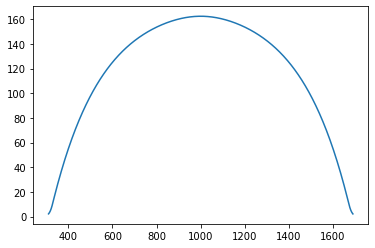

In [116]:
data = np.load("data/single_cell.npz")["z"]
xs, ys = get_cuts(data, 99)
max_h = np.nanmax(data, axis=1)[0:-1]
plt.plot(xs, ys)

/home/pablo/.conda/envs/my-conda-env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


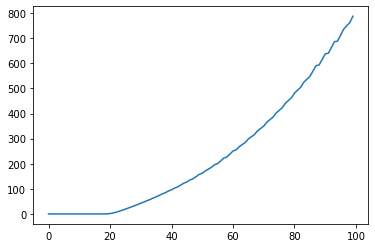

In [131]:
rmse_Gauss = np.zeros(len(data)-1)
for i in np.arange(len(data)-1):
    xs, ys = get_cuts(data, i)
    popt, pcov = curve_fit(gaussian, xs, ys, [1000, -200, 1])
    gauss_curve = gaussian(xs, popt[0], popt[1], popt[2])
    rmse_Gauss[i] = rmse(ys, gauss_curve)
plt.plot(rmse_Gauss / max_h)


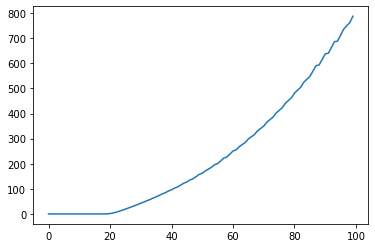

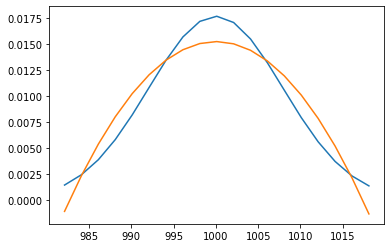

In [152]:
def sph_cap(x, x0, y0, r):
    return np.sqrt(-(x-x0)**2 + r**2) + y0

xs, ys = get_cuts(data, 1)
popt, pcov = curve_fit(sph_cap, xs, ys, [1000, -300, 1000])
sph_curve = sph_cap(xs, popt[0], popt[1], popt[2])
plt.plot(xs, ys)
plt.plot(xs, sph_curve)

In [148]:
rmse_Sph = np.zeros(len(data)-1)
for i in np.arange(len(data)-1):
    xs, ys = get_cuts(data, i)
    popt, pcov = curve_fit(sph_cap, xs, ys, [1000, -300, 1000])
    sph_curve = sph_cap(xs, popt[0], popt[1], popt[2])
    rmse_Sph[i] = rmse(ys, sph_curve)
#plt.plot(rmse_Gauss / max_h)

/home/pablo/.conda/envs/my-conda-env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/pablo/.conda/envs/my-conda-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


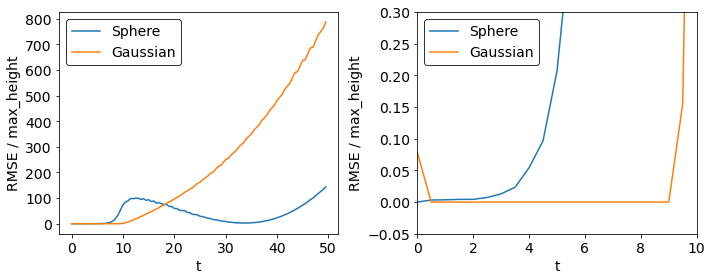

In [190]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t, rmse_Sph / max_h , label="Sphere")
plt.plot(t, rmse_Gauss / max_h, label="Gaussian")
plt.ylabel("RMSE / max_height", fontsize=14)
plt.xlabel("t", fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(edgecolor="k", fontsize=14)
plt.subplot(122)
plt.plot(t, rmse_Sph / max_h , label="Sphere")
plt.plot(t, rmse_Gauss / max_h, label="Gaussian")
plt.ylabel("RMSE / max_height", fontsize=14)
plt.xlabel("t", fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(edgecolor="k", fontsize=14)
plt.xlim(0, 10)
plt.ylim(-0.05, 0.3)
plt.tight_layout()
plt.savefig("figs/shape_fit.png", dpi=300, facecolor="white")

In [167]:
t = np.arange(0, 50, 0.5)

In [168]:
len(t)

100